In [64]:
import pandas as pd

In [65]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [67]:
df.isna().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


<Axes: ylabel='Rent'>

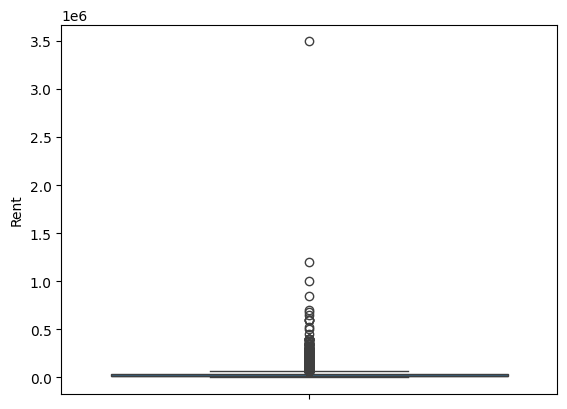

In [68]:
import seaborn as sns

sns.boxplot(df['Rent'])

In [69]:
for i in ['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']:
    print(i, df[i].nunique())

Floor 480
Area Type 3
Area Locality 2235
City 6
Furnishing Status 3
Tenant Preferred 3
Point of Contact 3


In [70]:
df = df.drop(['Floor', 'Area Locality', 'Posted On'], axis = 1)
df.head(2)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   City               4746 non-null   object
 5   Furnishing Status  4746 non-null   object
 6   Tenant Preferred   4746 non-null   object
 7   Bathroom           4746 non-null   int64 
 8   Point of Contact   4746 non-null   object
dtypes: int64(4), object(5)
memory usage: 333.8+ KB


**원핫인코딩**

In [72]:
df = pd.get_dummies(df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
df.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,20000,800,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,17000,1000,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,10000,800,1,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,7500,850,1,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


In [73]:
df.shape

(4746, 22)

In [74]:
X = df.drop("Rent", axis=1)  # 독립변수
y = df['Rent']  # 종속변수

X.head()

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,1100,2,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,800,1,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,1000,1,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,800,1,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,850,1,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


In [75]:
y

,Rent
0,10000
1,20000
2,17000
3,10000
4,7500
...,...
4741,15000
4742,29000
4743,35000
4744,45000


**데이터 분할**

In [76]:
from sklearn.model_selection import train_test_split

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2025)
X_tr.shape, X_test.shape, y_tr.shape, y_test.shape

((3322, 21), (1424, 21), (3322,), (1424,))

**모델링**

In [77]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_tr, y_tr)
pred = lr.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

print("mse: ", mean_squared_error(y_test, pred))
print("rmse: ", root_mean_squared_error(y_test, pred))

mse:  1845945611.7086728
rmse:  42964.46917755034


In [79]:
# Rent가 가장 높은 행
df.loc[df['Rent'].idxmax()]

,1837
BHK,3
Rent,3500000
Size,2500
Bathroom,3
Area Type_Built Area,False
Area Type_Carpet Area,True
Area Type_Super Area,False
City_Bangalore,True
City_Chennai,False
City_Delhi,False


In [80]:
X_tr.loc[1837]

,1837
BHK,3
Size,2500
Bathroom,3
Area Type_Built Area,False
Area Type_Carpet Area,True
Area Type_Super Area,False
City_Bangalore,True
City_Chennai,False
City_Delhi,False
City_Hyderabad,False


In [81]:
y_tr.loc[1837]

np.int64(3500000)

In [82]:
# 이상치로 판단되는 데이터 삭제
X_tr.drop(1837, inplace=True)
y_tr.drop(1837, inplace=True)

In [83]:
lr = LinearRegression()
lr.fit(X_tr, y_tr)
new_pred = lr.predict(X_test)
root_mean_squared_error(y_test, new_pred)

42987.37959096641

In [84]:
# 1837번 삭제 전 rmse: 42964.46917755034
# 1837번 삭제 후 rmse: 42987.37959096641

# 즉, 제거 전 rmse값이 더 좋다.

**로그 변환으로 RMSE 개선**

주택 임대료 데이터셋은 오른쪽으로 치우친 분포를 가지고 있습니다. 값이 큰 임대료(Outliers)가 평균과 모델 예측 결과에 큰 영향을 미치기 때문에 로그 변환을 통해 값의 범위를 축소하고, 분포를 정규 분포(Normal Distribution)에 가깝게 만듭니다. 로그 변환은 극단적으로 높은 값의 영향을 줄여주기 때문에 모델이 이상치에 덜 민감하게 반응하고 RMSE가 감소할 수 있습니다.

특히 지금처럼 Rent 값에 **극단적인 이상치(고가의 임대료)**가 있는 경우, **로그 변환(Log transformation)**을 하면 분포를 훨씬 더 정규분포에 가깝게 만들 수 있어요. 이건 머신러닝 모델의 성능 향상에도 도움을 줍니다.

In [85]:
import numpy as np

y_tr = np.log1p(y_tr)
y_test = np.log1p(y_test)

lr = LinearRegression()
lr.fit(X_tr, y_tr)
y_pred_log = lr.predict(X_test)

log_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)
print("rmse: ", root_mean_squared_error(y_test_original, log_pred))

original rmse:  33187.45360971534


In [88]:
# log 적용 전 RMSE: 42964.46917755034
# log 적용 후 RMSE: 33187.45360971534
42964.46917755034 -  33187.45360971534

9777.015567834998

**앙상블 모델 적용**

앙상블 모델(Ensemble Model)은 여러 개의 머신러닝 모델을 조합하여 하나의 강력한 예측 모델을 만드는 방법입니다. 각 개별 모델(약한 학습기, Weak Learner)이 가진 장점을 결합하고 약점을 보완함으로써 예측 정확도와 안정성을 향상시킵니다. 대표적인 앙상블 기법으로는 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking)이 있으며, 랜덤 포레스트(Random Forest)와 XGBoost는 각각 배깅과 부스팅을 대표하는 알고리즘입니다. 앙상블 모델은 특히 복잡한 문제나 다양한 패턴이 존재하는 데이터셋에서 뛰어난 성능을 발휘합니다.



In [91]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=2025),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=2025)
}

# 모델 학습 및 평가
results = {}
## 'Linear Regression': LinearRegression
for model_name, model in models.items():
    model.fit(X_tr, y_tr)
    y_pred_log = model.predict(X_test)

    # 로그 변환을 원래 값으로 복구
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    results[model_name] = rmse
    print(f'{model_name} RMSE: {rmse:.2f}')

Linear Regression RMSE: 33187.45
Random Forest RMSE: 33462.06
XGBoost RMSE: 36102.18


In [92]:
# 최적 모델 확인
best_model = min(results, key=results.get)
print(f'Best Model: {best_model} RMSE: {results[best_model]:.2f}')

Best Model: Linear Regression RMSE: 33187.45


In [93]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

results = {}
#  'Linear Regression': LinearRegression()
for model_name, model in models.items():
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    results[model_name] = rmse
    print(f'{model_name} RMSE: {rmse:.2f}')

Linear Regression RMSE: 42964.47
Random Forest RMSE: 39874.69
XGBoost RMSE: 35807.66


In [94]:
best_model = min(results, key=results.get)
print(f'Best Model: {best_model} RMSE: {results[best_model]:.2f}')

Best Model: XGBoost RMSE: 35807.66
